#Exploratary Data Analysis = NASA TurboFan Engine Data
#Predictive Maintenance Project

##What is this?
I am doing this project by looking at the NASA C-MAPSS dataset to understand sensor degration patterns in jet engines. My goal here is to predict Remaining Useful life (RUL) which is just how many cycles until the engine fails.

##Dataset for this Notebook
I am using FD001.txt dataset (it is most simplest one among all, it has only 1 fault mode, 1 operating condition and 100 engines).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from os import path
path = '/content/drive/MyDrive/Colab_Notebooks/predictive_maintenance_engine/data/raw/train_FD001.txt'

In [4]:
columns = ['engine_id', 'cycle']
columns += [f'operational_setting_{i}' for i in range(1,4)]
columns +=[f'sensors_{i}' for i in range(1,22)]

In [5]:
train_df_fd001 = pd.read_csv(path, sep = '\s+', header = None, names = columns)

In [6]:
train_df_fd001  # --> Each row represents one sensor snapshot of one engine at one cycle

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,...,sensors_12,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [7]:
train_df_fd001.shape

(20631, 26)

In [8]:
train_df_fd001['engine_id'].nunique()

100

In [9]:
train_df_fd001.describe()

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,...,sensors_12,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [10]:
train_df_fd001.isnull().sum()

,0
engine_id,0
cycle,0
operational_setting_1,0
operational_setting_2,0
operational_setting_3,0
sensors_1,0
sensors_2,0
sensors_3,0
sensors_4,0
sensors_5,0


In [11]:
# I am now checking the sensor values of engine 1 at the beginning vs the end
engine_id_1 = train_df_fd001.query('engine_id == 1')
engine_id_1

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,...,sensors_12,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [12]:
engine_id_1.head()

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,...,sensors_12,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [13]:
engine_id_1.tail()

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,...,sensors_12,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649


- Engine 1 lasts for 192 cycles --> it has lifetime of 192 cycles
- Regarding sensors reading of engine 1 at first 5 cycles and last 5 cycles are different to each other which gives us hint that there's degradation in the condition of engine.



In [14]:
engine_id_5 = train_df_fd001.query('engine_id == 5')
engine_id_5

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,...,sensors_12,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21
847,5,1,0.0031,0.0002,100.0,518.67,641.77,1583.59,1395.26,14.62,...,522.34,2388.00,8152.22,8.4102,0.03,393,2388,100.0,38.98,23.4468
848,5,2,0.0002,0.0003,100.0,518.67,642.42,1589.69,1394.88,14.62,...,522.60,2387.99,8153.04,8.4053,0.03,392,2388,100.0,39.12,23.4075
849,5,3,0.0002,-0.0005,100.0,518.67,642.07,1582.45,1396.29,14.62,...,522.85,2388.02,8148.42,8.3990,0.03,393,2388,100.0,39.18,23.3298
850,5,4,0.0017,-0.0004,100.0,518.67,642.08,1586.84,1397.94,14.62,...,522.11,2387.99,8148.81,8.3876,0.03,390,2388,100.0,39.22,23.4306
851,5,5,-0.0007,0.0001,100.0,518.67,642.03,1581.45,1394.28,14.62,...,522.60,2387.95,8147.69,8.4129,0.03,390,2388,100.0,39.17,23.3331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,5,265,0.0028,-0.0003,100.0,518.67,643.80,1605.53,1424.57,14.62,...,519.80,2388.10,8203.89,8.5410,0.03,395,2388,100.0,38.35,23.0857
1112,5,266,0.0000,-0.0002,100.0,518.67,643.38,1609.33,1434.40,14.62,...,519.57,2388.14,8208.49,8.5254,0.03,398,2388,100.0,38.55,23.1621
1113,5,267,0.0018,0.0001,100.0,518.67,643.73,1609.41,1430.25,14.62,...,519.66,2388.17,8206.86,8.5292,0.03,397,2388,100.0,38.49,23.0566
1114,5,268,0.0033,-0.0002,100.0,518.67,644.02,1608.65,1434.59,14.62,...,520.10,2388.14,8215.19,8.5196,0.03,397,2388,100.0,38.52,23.1180


In [15]:
engine_id_50 = train_df_fd001.query('engine_id == 50')
engine_id_50

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,...,sensors_12,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21
9711,50,1,0.0015,-0.0006,100.0,518.67,642.12,1582.50,1400.44,14.62,...,521.97,2388.08,8141.04,8.4366,0.03,394,2388,100.0,38.96,23.3947
9712,50,2,0.0008,0.0002,100.0,518.67,642.62,1589.90,1404.14,14.62,...,522.27,2388.02,8138.39,8.4211,0.03,394,2388,100.0,38.91,23.4594
9713,50,3,-0.0012,0.0002,100.0,518.67,642.55,1582.75,1403.42,14.62,...,522.40,2388.04,8143.16,8.3931,0.03,392,2388,100.0,38.97,23.3230
9714,50,4,-0.0035,-0.0005,100.0,518.67,642.61,1586.91,1403.46,14.62,...,522.25,2388.08,8141.20,8.4286,0.03,393,2388,100.0,38.91,23.3886
9715,50,5,-0.0018,0.0003,100.0,518.67,642.41,1589.70,1401.43,14.62,...,522.10,2388.00,8143.94,8.4295,0.03,394,2388,100.0,38.98,23.3340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,50,194,0.0037,0.0004,100.0,518.67,643.77,1604.93,1423.51,14.62,...,519.85,2388.19,8194.20,8.5043,0.03,396,2388,100.0,38.42,23.0543
9905,50,195,0.0019,-0.0004,100.0,518.67,643.33,1605.31,1434.87,14.62,...,519.33,2388.21,8200.90,8.5352,0.03,395,2388,100.0,38.45,23.0191
9906,50,196,0.0020,-0.0002,100.0,518.67,643.32,1602.26,1430.01,14.62,...,519.88,2388.17,8194.10,8.5034,0.03,395,2388,100.0,38.45,23.0379
9907,50,197,-0.0026,-0.0001,100.0,518.67,643.73,1599.94,1432.87,14.62,...,519.48,2388.20,8194.64,8.5241,0.03,397,2388,100.0,38.52,23.0832


In [16]:
# Lifetimes of Engine 1, 5 and 50
print(f'The lifetime of engine 1 is {engine_id_1['cycle'].max()}')
print(f'The lifetime of engine 5 is {engine_id_5['cycle'].max()}')
print(f'The lifetime of engine 50 is {engine_id_50['cycle'].max()}')

The lifetime of engine 1 is 192
The lifetime of engine 5 is 269
The lifetime of engine 50 is 198


In [17]:
engine_lifetime = train_df_fd001.groupby('engine_id')['cycle'].max()
engine_lifetime

,cycle
engine_id,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


In [18]:
print(f'The shortest lived engine is engine {engine_lifetime.idxmin()} which has {engine_lifetime.min()} cycles')
print(f'The longest lived engine is engine {engine_lifetime.idxmax()} which has {engine_lifetime.max()} cycles')

The shortest lived engine is engine 39 which has 128 cycles
The longest lived engine is engine 69 which has 362 cycles


In [19]:
print(f'The description of Engine lifetime')
engine_lifetime.describe()

The description of Engine lifetime


,cycle
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


In [20]:
# --> I use the concept of vectorization of pandas here which help me to calculate RUL for all row at once.

train_df_fd001['RUL'] = train_df_fd001['engine_id'].map(engine_lifetime) - train_df_fd001['cycle']
train_df_fd001.head()

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,...,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [21]:
train_df_fd001['RUL'] = train_df_fd001['RUL'].clip(upper = 125)
train_df_fd001

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,...,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,125
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,125
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,125
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,125
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [22]:
train_df_fd001[train_df_fd001['engine_id'] == 100]

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,...,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21,RUL
20431,100,1,-0.0033,0.0003,100.0,518.67,642.25,1596.57,1404.52,14.62,...,2388.14,8146.76,8.4177,0.03,393,2388,100.0,38.72,23.3899,125
20432,100,2,0.0010,-0.0004,100.0,518.67,642.37,1589.43,1397.40,14.62,...,2388.10,8143.56,8.4186,0.03,393,2388,100.0,39.18,23.2460,125
20433,100,3,0.0024,-0.0004,100.0,518.67,643.13,1588.55,1397.71,14.62,...,2388.09,8146.62,8.4391,0.03,393,2388,100.0,38.95,23.2034,125
20434,100,4,0.0014,0.0001,100.0,518.67,642.33,1588.13,1397.93,14.62,...,2387.97,8146.60,8.4274,0.03,393,2388,100.0,38.77,23.2495,125
20435,100,5,-0.0018,0.0003,100.0,518.67,641.90,1590.02,1400.60,14.62,...,2388.09,8141.82,8.3650,0.03,392,2388,100.0,39.06,23.2351,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


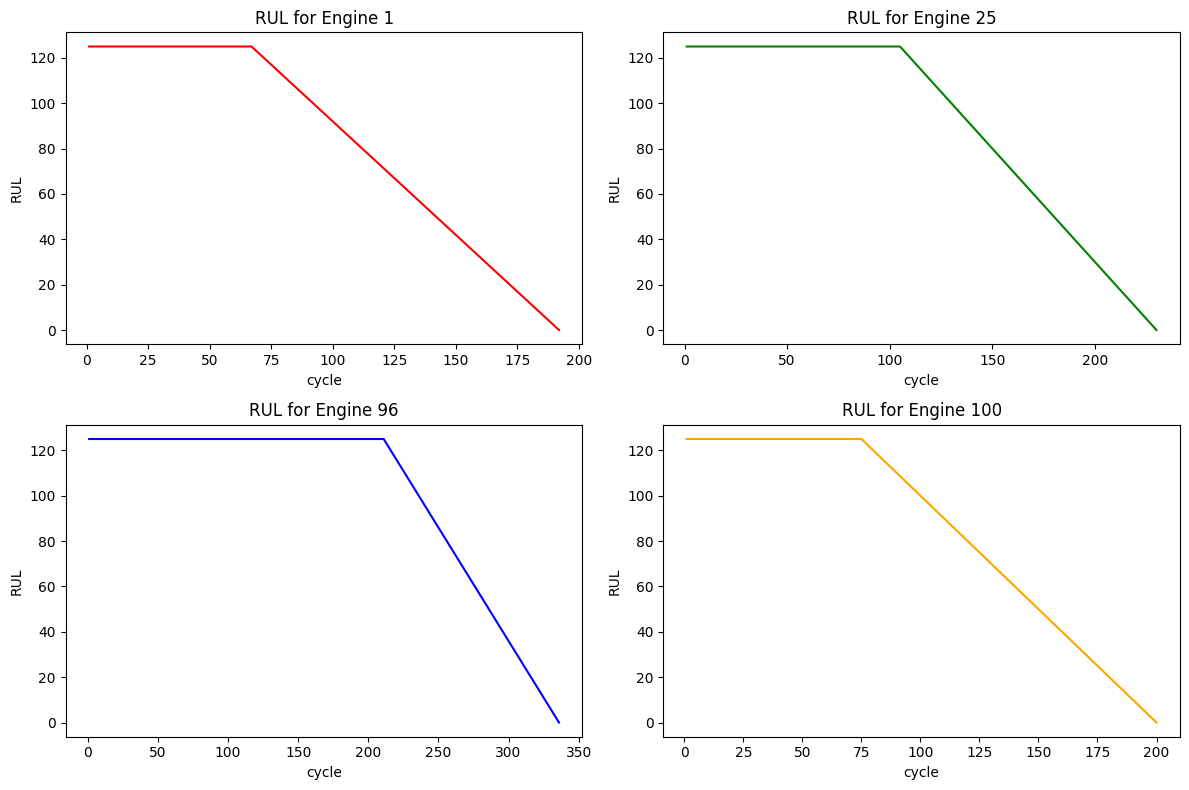

In [23]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
sns.lineplot(data = train_df_fd001[train_df_fd001['engine_id'] == 1], x = 'cycle', y = 'RUL', color = 'red')
plt.title('RUL for Engine 1')

plt.subplot(2,2,2)
sns.lineplot(data = train_df_fd001.query('engine_id == 25'), x = 'cycle', y = 'RUL', color = 'green')
plt.title('RUL for Engine 25')

plt.subplot(2,2,3)
sns.lineplot(data = train_df_fd001.query('engine_id == 96'), x = 'cycle', y = 'RUL', color = 'blue')
plt.title('RUL for Engine 96')

plt.subplot(2,2,4)
sns.lineplot(data = train_df_fd001.query('engine_id == 100'), x = 'cycle', y = 'RUL', color = 'orange')
plt.title('RUL for Engine 100')

plt.tight_layout()
plt.show()



## **I capped RUL at 125 because in the early stage of engine cycle, there's no such significant difference in sensor reading. For example, engine with RUL 200 and other with RUL 150 looks almost similar. So, the cap helps model later to focus on actual degradation phase where prediction matters more.**

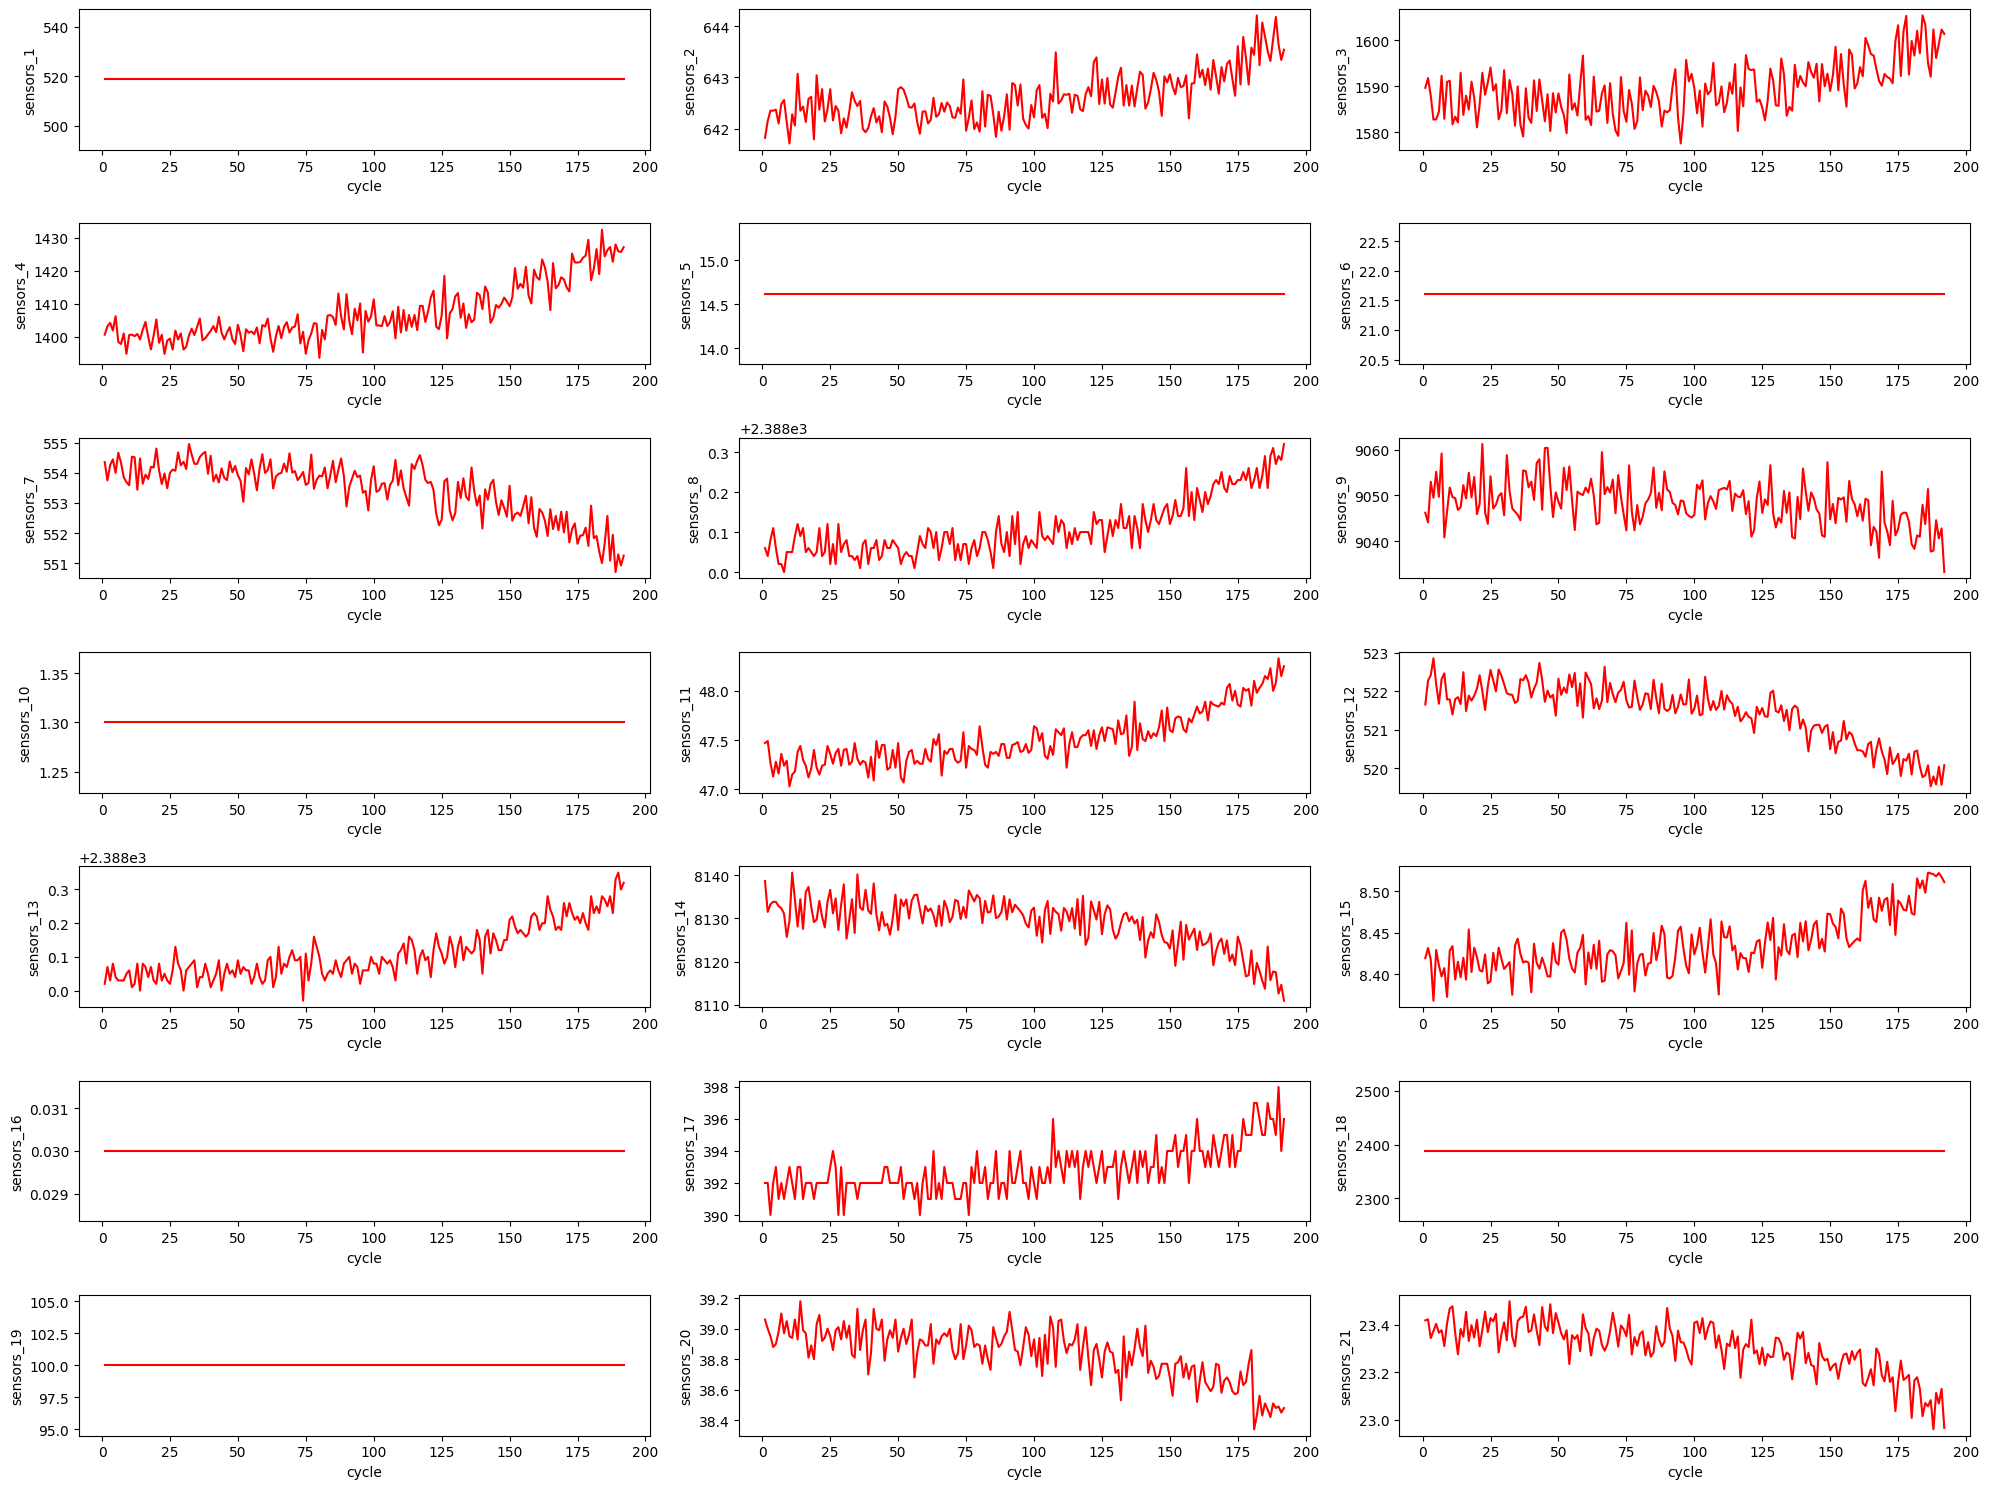

In [24]:
# Sensor Reading for Engine 1

fig, axes = plt.subplots(7, 3, figsize = (20,15))
axes = axes.flatten()

for i, ax in enumerate(axes):
  sensor = f'sensors_{i+1}'
  sns.lineplot(data = train_df_fd001[train_df_fd001['engine_id'] == 1], x = 'cycle', y = sensor, ax = ax, color = 'red')

plt.tight_layout()
plt.show()



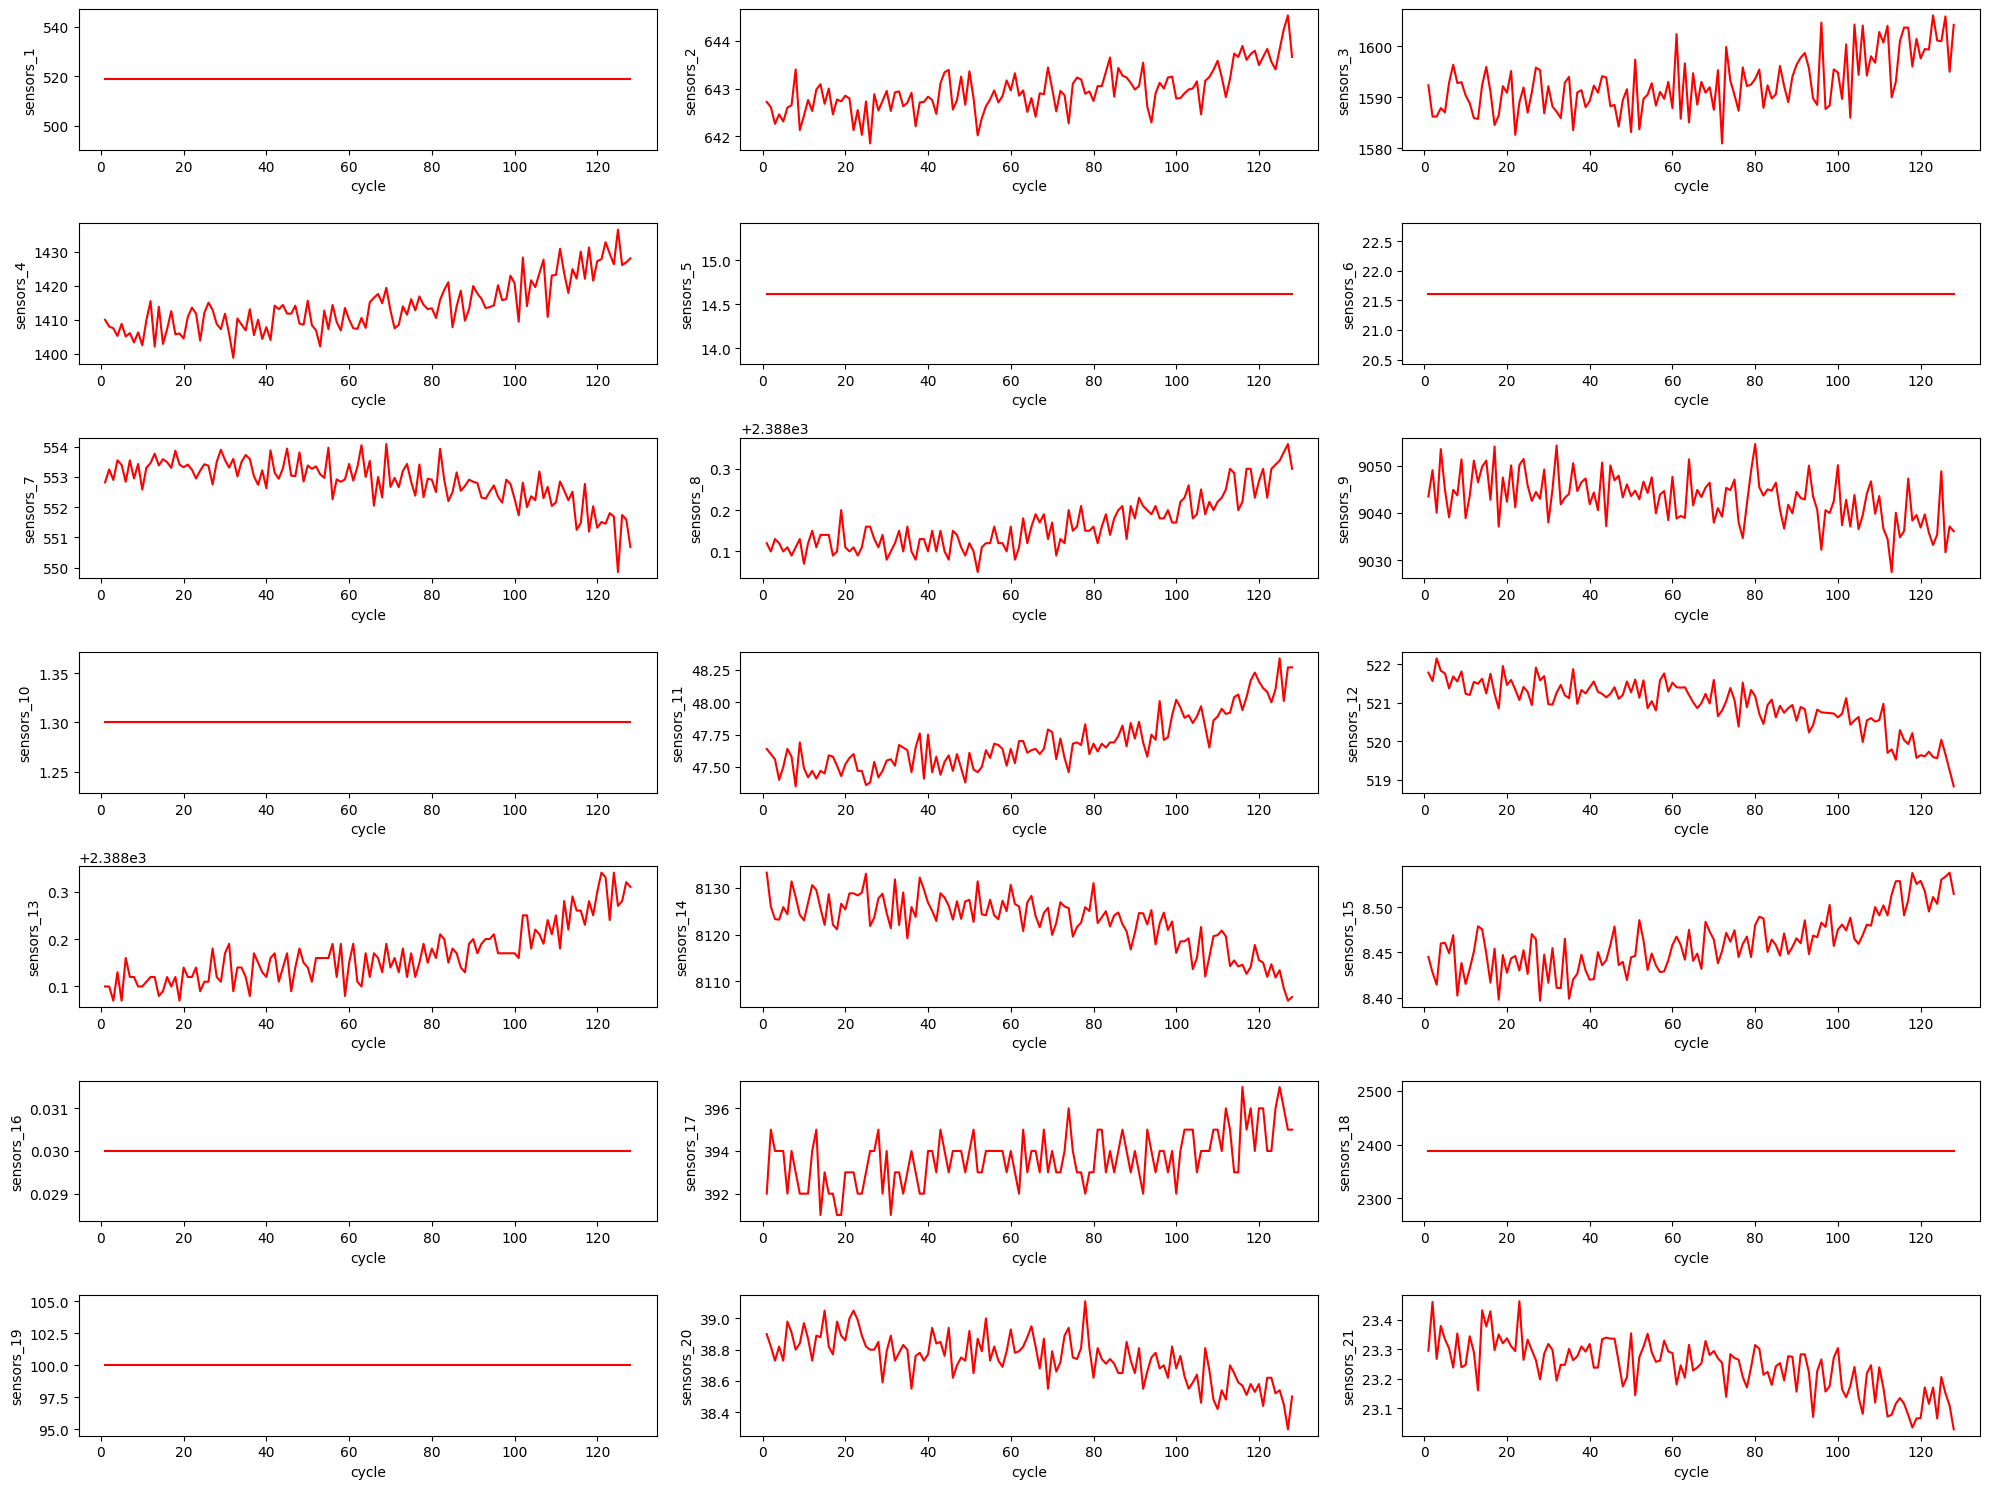

In [25]:
# Sensor reading for engine 39 --> Short lived engine

fig, axes = plt.subplots(7, 3, figsize = (20,15))
axes = axes.flatten()

for i, ax in enumerate(axes):
  sensor = f'sensors_{i+1}'
  sns.lineplot(data = train_df_fd001[train_df_fd001['engine_id'] == 39], x = 'cycle', y = sensor, ax = ax, color = 'red')

plt.tight_layout()
plt.show()

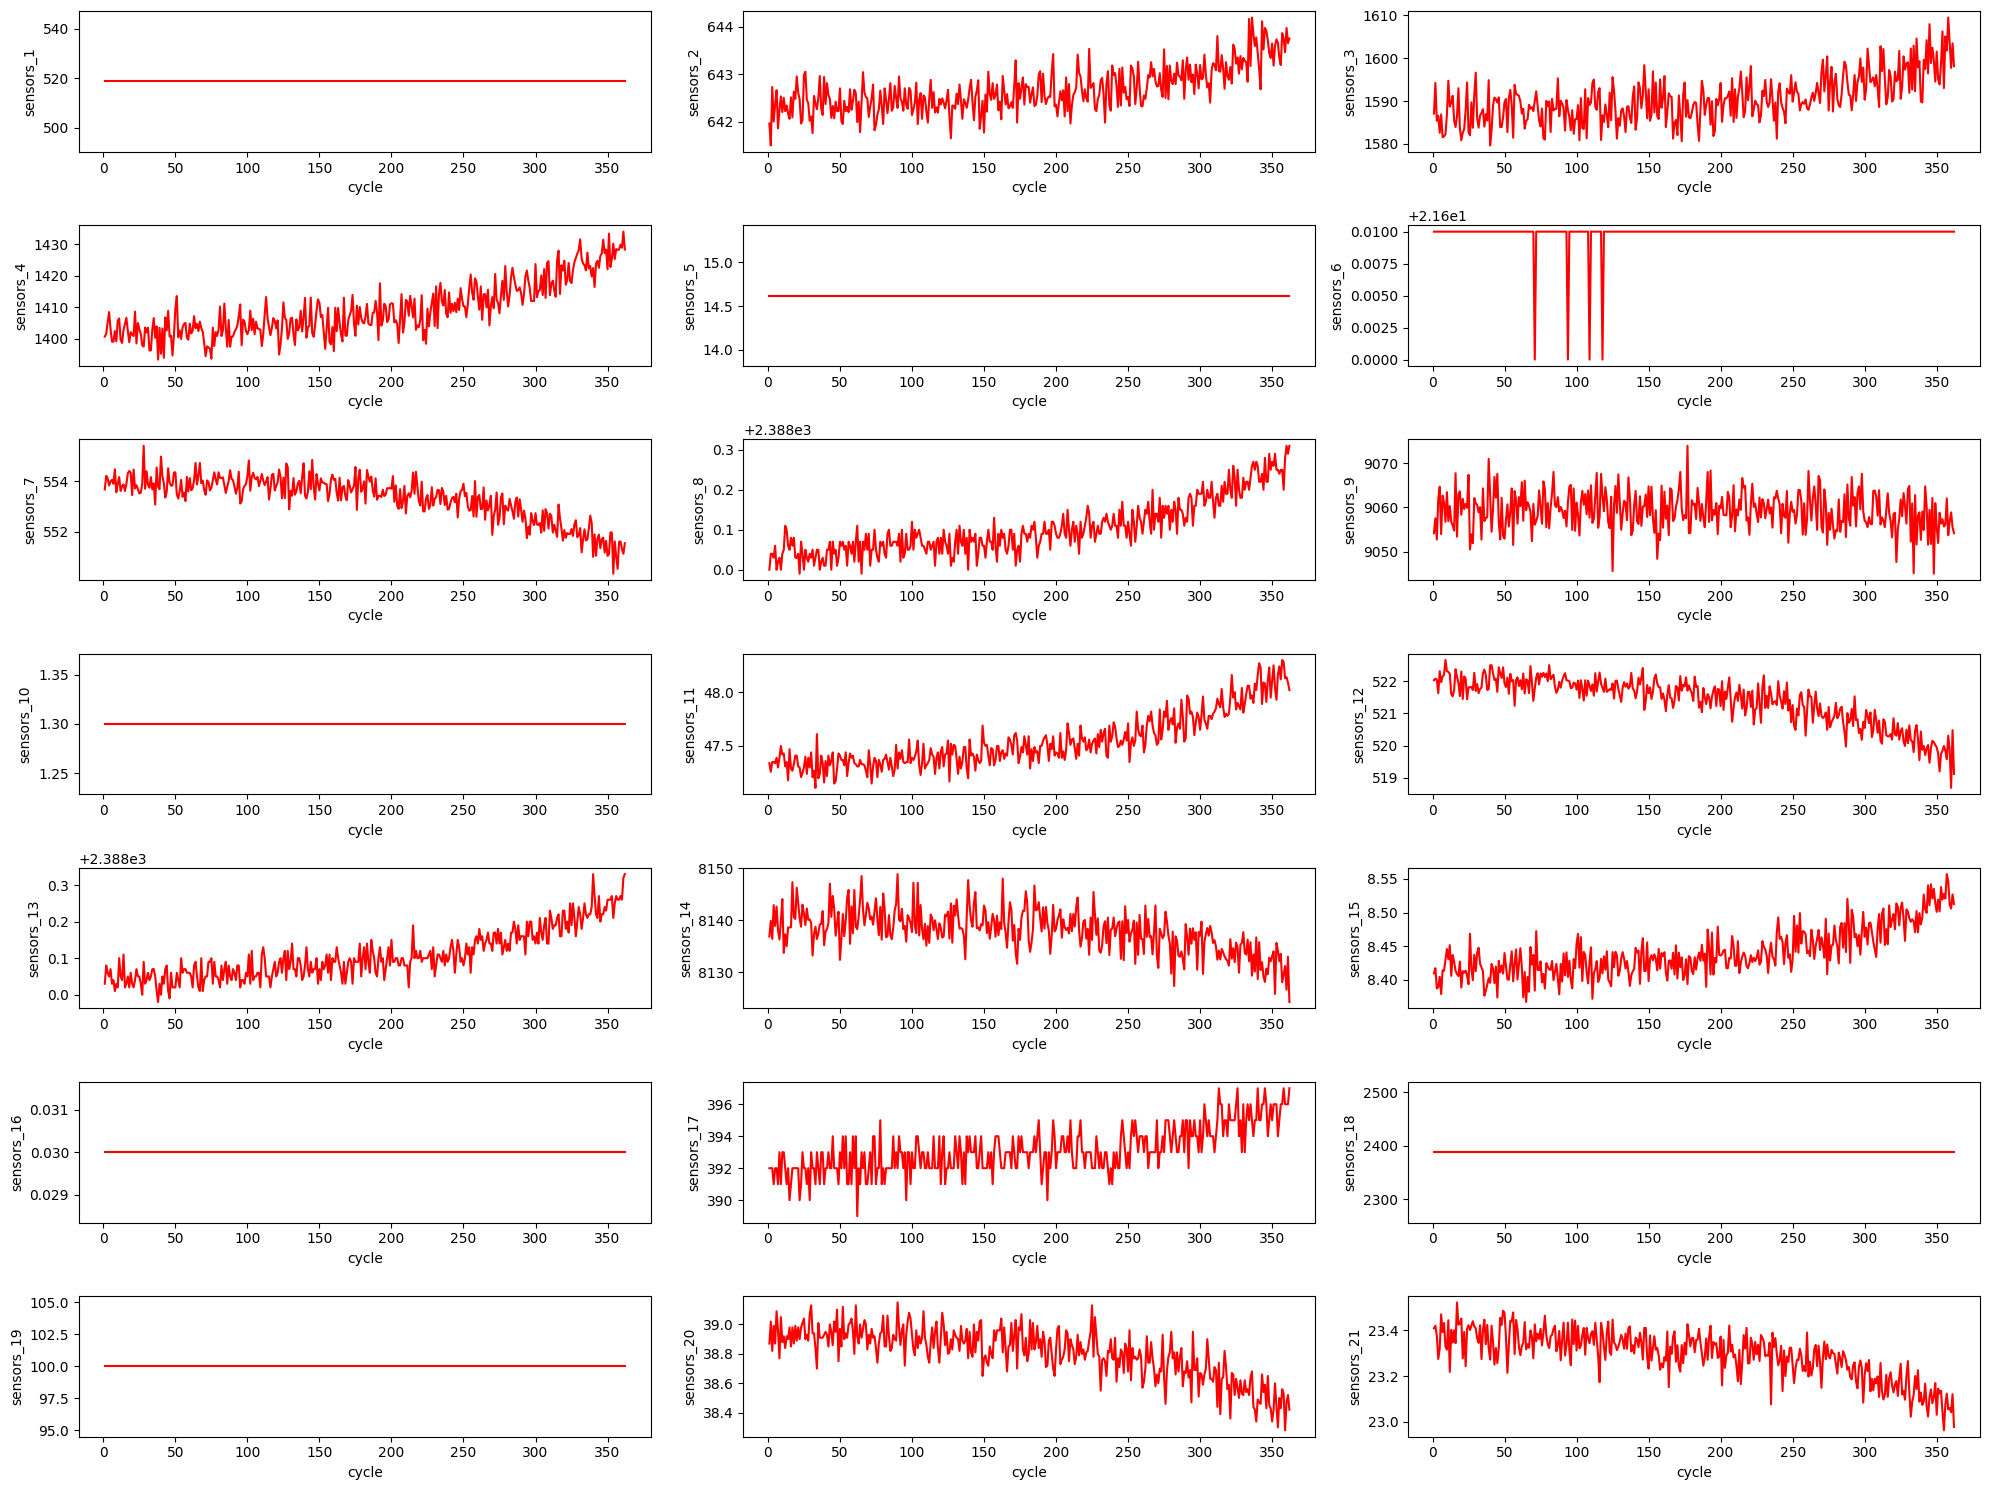

In [26]:
# Sensor reading for engine 69 --> Longest lived engine

fig, axes = plt.subplots(7, 3, figsize = (20,15))
axes = axes.flatten()

for i, ax in enumerate(axes):
  sensor = f'sensors_{i+1}'
  sns.lineplot(data = train_df_fd001[train_df_fd001['engine_id'] == 69], x = 'cycle', y = sensor, ax = ax, color = 'red')

plt.tight_layout()
plt.show()

In [27]:
sensor_cols = [f'sensors_{i}' for i in range(1,22)]
sensor_stat = train_df_fd001[sensor_cols].describe()
sensor_stat

,sensors_1,sensors_2,sensors_3,sensors_4,sensors_5,sensors_6,sensors_7,sensors_8,sensors_9,sensors_10,...,sensors_12,sensors_13,sensors_14,sensors_15,sensors_16,sensors_17,sensors_18,sensors_19,sensors_20,sensors_21
count,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [28]:
std = sensor_stat.loc['std']
print(std)

sensors_1     6.537152e-11
sensors_2     5.000533e-01
sensors_3     6.131150e+00
sensors_4     9.000605e+00
sensors_5     3.394700e-12
sensors_6     1.388985e-03
sensors_7     8.850923e-01
sensors_8     7.098548e-02
sensors_9     2.208288e+01
sensors_10    4.660829e-13
sensors_11    2.670874e-01
sensors_12    7.375534e-01
sensors_13    7.191892e-02
sensors_14    1.907618e+01
sensors_15    3.750504e-02
sensors_16    1.556432e-14
sensors_17    1.548763e+00
sensors_18    0.000000e+00
sensors_19    0.000000e+00
sensors_20    1.807464e-01
sensors_21    1.082509e-01
Name: std, dtype: float64


**From the line plots of sensors above and the standard deviation, we can know that there are some sensors that doesn't show any variation in the engine lifetime --> those sensors are useless and we can drop them from the data while training our model later.**
- Useless sensors that has almost zero variation are:-
--> [sensors = 1, 5, 10, 16, 18, 19]

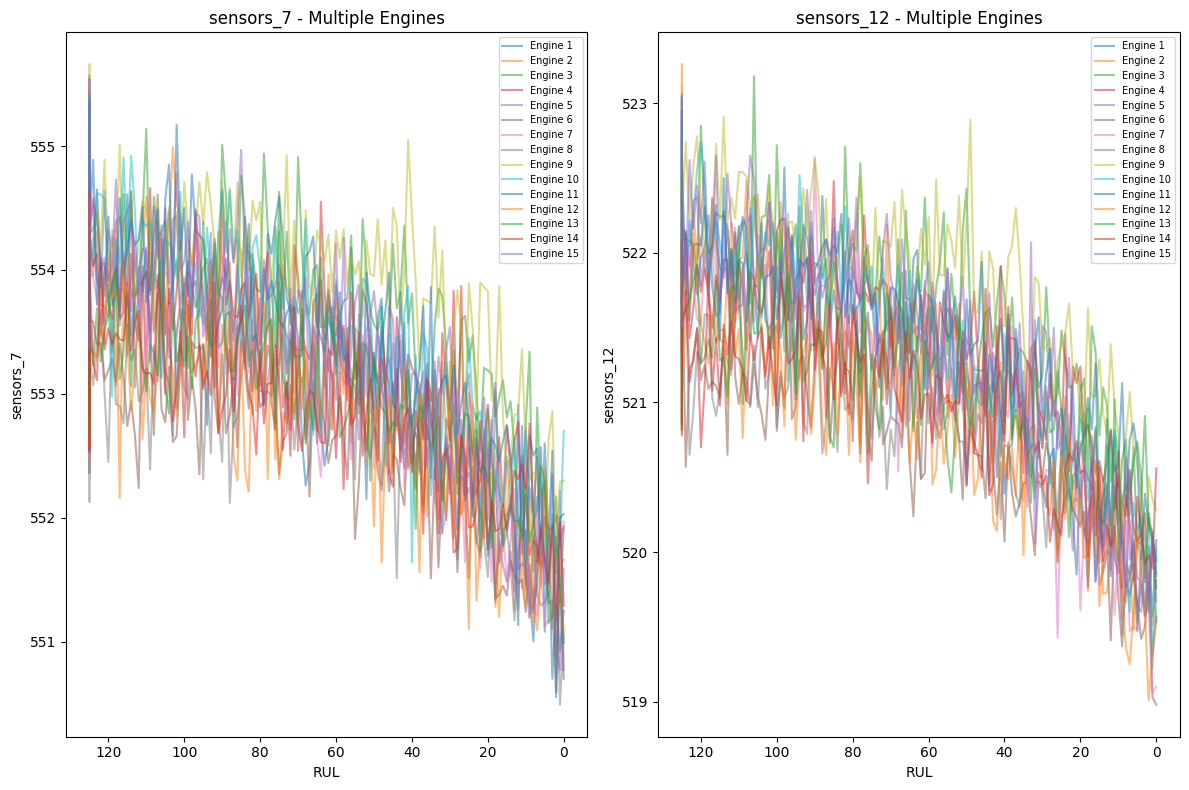

In [29]:
engines = train_df_fd001['engine_id'].unique()[:15]  # First 15 engines

fig, axes = plt.subplots(1, 2, figsize = (12,8))

for sensor, ax in zip(['sensors_7', 'sensors_12'], axes):
  for engine in engines:
    data = train_df_fd001[train_df_fd001['engine_id'] == engine]
    ax.plot(data['RUL'], data[sensor], alpha = 0.5, label = f'Engine {engine}')

  ax.invert_xaxis()
  ax.set_title(f'{sensor} - Multiple Engines')
  ax.set_xlabel('RUL')
  ax.set_ylabel(sensor)
  ax.legend(fontsize = 7, loc = 'upper right')

plt.tight_layout()
plt.show()

**From the above plot, we can see that there's clear degradation in the sensor values when the engine's RUL goes on decreasing. This is very useful pattern later for our model to be trained on. Here, I have used RUL on x-axis instead of cycle and also inverted the X-axis because degradation is more consistent when measured relative to failure than relative to start time.**

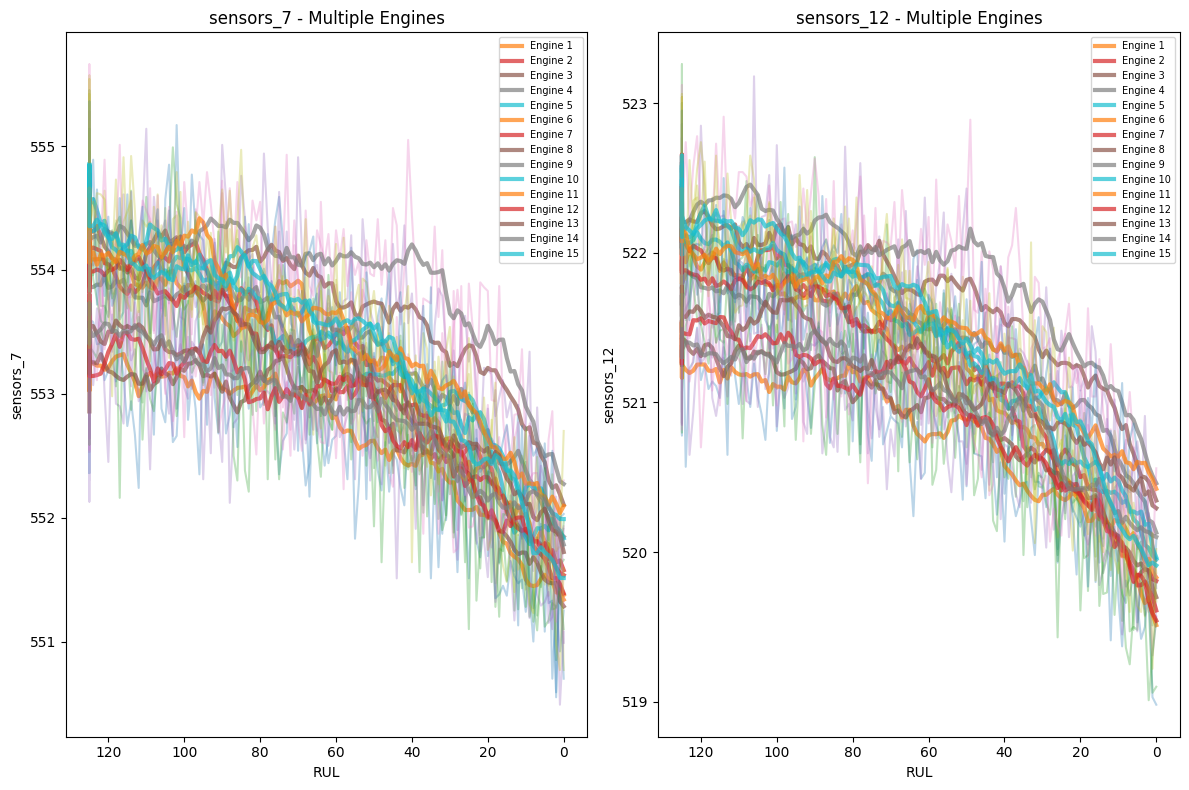

In [30]:
# Here, I applied rolling average on sensor reading to get smoothed plot and see the degradation better as compare to above plot.

engines = train_df_fd001['engine_id'].unique()[:15]  # First 15 engines

fig, axes = plt.subplots(1, 2, figsize = (12,8))

for sensor, ax in zip(['sensors_7', 'sensors_12'], axes):
  for engine in engines:
    data = train_df_fd001[train_df_fd001['engine_id'] == engine]
    ax.plot(data['RUL'], data[sensor], alpha = 0.3, linewidth = 1.5)
    ax.plot(data['RUL'], data[sensor].rolling(10).mean(), alpha = 0.7, linewidth = 3, label = f'Engine {engine}')

  ax.invert_xaxis()
  ax.set_title(f'{sensor} - Multiple Engines')
  ax.set_xlabel('RUL')
  ax.set_ylabel(sensor)
  ax.legend(fontsize = 7, loc = 'upper right')

plt.tight_layout()
plt.show()